# Cogs 108 Final Project

# Overview 

The hospitality industry is something that is often overlooked, there are numerous factors(features) that a hotel has to take into consideration to estimate demand over different periods of time and fluctuations as a result of seasonality. Every traveller has a different profile - business travellers, families, families with children, length of stay, frequency of travel. All these profiles somewhere define how likely each set of hotel bookings is prone to cancellations. Preparing(Predicting) for these cancellations can bring in a lot of revenue for these hotels - a classic estimation problem. By predicting the rate of cancellation across different groups hotels can approach each group of customers with a different payment strategy. These payment strategies include charging the customer a security deposit on their reservation, or allowing them to book commitment free if there's a lower chance of them cancelling the booking and therefore creating a maximal situation on the pareto optimal curve between experience and flexibility for the users and costs for the hotel. 

## Team 
- Neel Shah  
- Ethan Khong
- Alex Pham
- Pratyush Juneja

# Research Quesiton 

Which of the following factors from arrival time, length of stay, previous cancellations, family type plays the most significant role in affecting the rate of cancellation for Hotel Bookings.

# Background and Prior Work 

### The Problem 
Amid the coronavirus pandemic there is a lot of press about hotel cancellation policies and how they're dynamically changing amidst hotels taking in millions of losses due to travel bans and itinerary cancellations.
A travel itinerary consists of multiple components - transport, hotels, local transport and tourism.
Modes of tansport(flights, cruises) have higher proportion of people who have insurances and coverages to cover their losses. For consumers with respect to hotel bookings they are more prone to find cheaper deals on third party websites rather than book directly through hotel company portals which limits the coverage provided by hotels. This effect is balanced out by the fact that the hotel companies offer flexible cancellations and the ability to book rooms without financial commitment. Although the idea of having a one fit for all strategy with flexible hotel bookings doesn't allow hotels to maximize revenue or handle the load of guests. 
<br /> 
### The role data plays
The hotel industry as a whole is very underrated in the context of how volatile a business it is. The purpose which data serves in this instance is to create a layer of abstraction for the companies to be able to minimize this volatility. Tourism trends, competition(AirBnb), political volatility - all factor in the larger context of understanding of the volatility, the part this dataset and the problem statement focus on is individual booking and the chance of cancellation on a case-by-base basis. We plan to look at larger trends on the timeline as well in addition to the geographical impacts to make sure we're not pushing a customer type into a category given a situation out of one's control - a form of handling real life(not numerical) outliers.
<br /> 


### Background Information
The two projects we found most related to ours were **Using Data Science to Predict Hotel Booking Cancellations** and **Predicting Hotel Cancellations with Machine Learning** 

When looking at previous research done in this particular area a study conducted by Nuno Antonio, Anda de Almeida, and Luis Nunes the hospitality industry was looked at as a whole and a tool was used to create an automated machine learning based support system to predict the cancellation of hotel bookings (Antonio, N.).  The goal of the system was to make accurate predictions on the hotel's net demand and be able to make decisions on whether or not to accept or reject bookings. The model takes into account critical aspects of the hotel industry such as overbooking which is important to balance losses. The study stated that the model was able to identify the relative cancellation rate according to a wide variety of factors such as nationally, language, and other personal information not accessible. This left a gap that allowed future research to focus on predictive power of particular features such as arrival time, family members, etc. 

Another model used to predict cancellations was conducted by Michael Grogan who used a neural network type model (LSTM) to predict fluctuations in cancellations on a week to week basis to help chains allocate capacity better. His work built off the ideas presented in the paper written by Antonio, Almeida, and Nunes. The model predicted the cancellation trends 86% of the time with comparisons ran amongst other tests and models. The information within this model highlighted the country of origin and other factors to be major contributors to predicting the change of cancellation on a week-to-week basis. This allows a general framework to build off of when looking at the overall hotel booking data and where to guide attention to.  

### References

Antonio, N., de Almeida, A. and Nunes, L., 2019. An Automated Machine Learning Based Decision Support System to Predict Hotel Booking Cancellations. Data Science Journal, 18(1), p.32. DOI: http://doi.org/10.5334/dsj-2019-032

Michael, G. 2019, Predicting Hotel Cancellations with Machine Learning, https://github.com/MGCodesandStats/hotel-modelling



# Hypothesis 

Traveling with children can be stressful and add a lot of headache when planning a family vacation. An article published by National Geographic offers parents a detailed step-by-step process on how to travel with children suggesting the difficulty associated with traveling with young passengers. 

Given this information we predict that the higher number of children under a reservation will result in an increase rate of cancellation amongst hotel bookings.

# Dataset(s)
Dataset Name: Hotel Booking Data <br /> 
Link to the dataset: https://www.kaggle.com/jessemostipak/hotel-booking-demand <br /> 
Number of observations: This dataset contains 20,600 rows and 32 columns <br /> 

The dataset being used was created by Jesse Mostipak and consists of data gathered from a city hotel and resort hotel. All personal information of guests who participated has been removed and information such as parking spaces, number of children, and more can be found within the dataset to be used for EDA and predictive modeling. 


# Setup
We mainly use the following Python packages in this project: <br />

NumPy: A package that is used to perform scientific computation in Python. It allows us to use a powerful N- dimensional array object along with powerful broadcasting capabilities and mathematical concepts like Linear Algebra, which is critical to Linear Regression we use later. <br />

Pandas: Open source library that allows us to utilize powerful data structures and data analysis in Python.<br />

Seaborn: A Python data visualization library built on matplotlib that allows for the drawing of visually  appealing graphs.<br />

SciPy: Open source software that enables us to work on Mathematics, Science and Engineering projects.<br />

Scikit-learn: An effective package that allows us to perform data mining and data analysis. It was originally built on NumPy, 

SciPy and matplotlib.<br />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

# Data Cleaning

In [2]:
path = r'C:\Users\ETHAN\Downloads\hotel-booking-demand-20200314T035807Z-001\hotel-booking-demand/hotel_bookings.csv'
hotel = pd.read_csv(path)

In [3]:
# Show missing values
hotel.isna().sum() 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
# Replace missing values within each column based off of dictionary

nan = {"children": 0.0,"country": "Unknown", "agent": 0, "company": 0} 

hotel_clean = hotel.fillna(nan) 

In [5]:
# Rename undefined to SC within meal column to specify no meal package was ordered with the room. 

hotel_clean['meal'].replace("Undefined","SC", inplace  = True)

In [6]:
len(hotel_clean)


119390

In [7]:
# Dropping entries with no requests

zero = list(hotel_clean.loc[hotel_clean["adults"]+hotel_clean['children']+hotel_clean['babies']==0].index)

hotel_clean.drop(hotel_clean.index[zero],inplace = True)

In [8]:
# Dropping entries with no requests

zero = list(hotel_clean.loc[hotel_clean["adults"]+hotel_clean['children']+hotel_clean['babies']==0].index)

hotel_clean.drop(hotel_clean.index[zero],inplace = True)

len(hotel_clean)

len(hotel)

len(hotel)-len(hotel_clean)

#180 records removed

180

In [9]:
len(hotel_clean)

119210

In [10]:
hotel_clean.isna().sum() # Show if missing values were removed

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Data Analysis & Results 

## EDA

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# df = pd.read_csv("Downloads/hotel-booking-demand/hotel_bookings.csv")
df = hotel_clean

#You can rename the dataframe to something else here if needed
#df = 



In [12]:
#Checking the column types
df.dtypes



hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [13]:
#Peek at some rows
df.head()



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
#Get statistics on columns
df.describe()



,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Reservations w/ and w/o Children

In [15]:
#Comparison of COUNTS of cancelled reservations and non canceled based on number of children
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [16]:
#Comparison of COUNTS of cancelled reservations and non canceled based on number of children
df.groupby('is_canceled')['children'].value_counts().to_frame()

children
is_canceled children          
0           0.0          69547
            1.0           3294
            2.0           2111
            3.0             59
1           0.0          41073
            1.0           1567
            2.0           1541
            3.0             17
            10.0             1

In [17]:
#Comparison of PERCENTAGES of cancelled reservations and non canceled based on number of children
df.groupby('children')['is_canceled'].value_counts(normalize = True).to_frame()

is_canceled
children is_canceled             
0.0      0               0.628702
         1               0.371298
1.0      0               0.677638
         1               0.322362
2.0      0               0.578039
         1               0.421961
3.0      0               0.776316
         1               0.223684
10.0     1               1.000000

In [18]:
#Same as above but only shows the percentage of canceled reservations
df.groupby('children')['is_canceled'].value_counts(normalize = True)[:,1].to_frame()

,is_canceled
children,
0.0,0.371298
1.0,0.322362
2.0,0.421961
3.0,0.223684
10.0,1.000000


The above table can be read like, for example, for reservations with 0 children, 37% were cancelled. 

These tables all focus on the number of children, but what may be a deciding factor is whether or not a reservation has children on it at all. So let's take a look at that.

In [19]:
#Create a boolean feature for whether or not a reservation has kids on it
df['has_kids'] = df['children'].apply(lambda x: x > 0)

In [20]:
df.groupby('has_kids')['is_canceled'].value_counts(normalize=True).to_frame()

is_canceled
has_kids is_canceled             
False    0               0.628702
         1               0.371298
True     0               0.636088
         1               0.363912

Below are two bar graphs visualizing the above table.

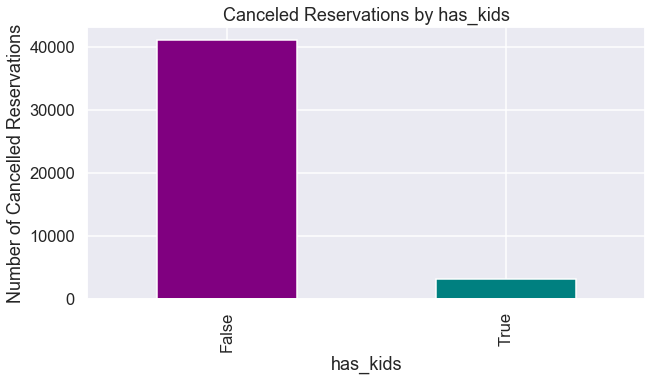

In [21]:
#Plot of COUNTS of canceled reservations based on whether or not a reservation has kids
df.groupby('is_canceled')['has_kids'].value_counts()[1].plot(kind='bar', color=['purple','teal'], figsize=(10,5));
plt.title("Canceled Reservations by has_kids");
plt.ylabel("Number of Cancelled Reservations");

In [22]:
df.groupby('is_canceled')['has_kids'].value_counts()[1].to_frame()

,has_kids
has_kids,
False,41073
True,3126


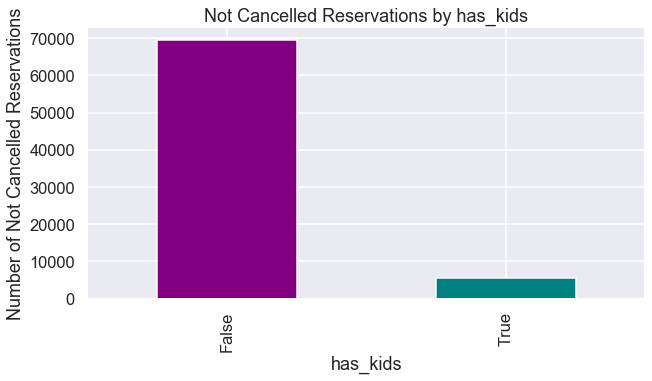

In [23]:
#Plot of COUNTS of NOT canceled reservations based on whether or not a reservation has kids
df.groupby('is_canceled')['has_kids'].value_counts()[0].plot(kind='bar', color=['purple','teal'], figsize=(10,5));
plt.title("Not Cancelled Reservations by has_kids");
plt.ylabel("Number of Not Cancelled Reservations");

In [24]:
df.groupby('is_canceled')['has_kids'].value_counts()[0].to_frame()

,has_kids
has_kids,
False,69547
True,5464


Based off of visualizing the data we have so far, it doesn't actually look like having kids has much of a noticeable affect on whether or not a reservation is canceled. However, we can solidify our confidence in such by formally doing a **permutation test**.

## Permutation Test

A permutation test tells us whether or not two distributions are the same or not. We can use this to see if partitioning the dataset into 2 distributions (having kids and not having kids) will significantly affect whether or not a reservation is canceled, as the distribution for cancelled reservations could possibly change.

In [25]:
#Make a dataframe to use in the permutation test (it only has the columns we need)
permute_df = df[['is_canceled','has_kids']]

In [26]:
#Here, we're gonna do a permutation test to gather some simulated test statistics
n_repetitions = 500

differences = []
for _ in range(n_repetitions):
    
    # shuffle the weights
    # Could be the labels instead, either one. 
    shuffled_weights = (
        permute_df['is_canceled']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    # So this is adding the shuffled column as an additional column in the original df
    shuffled = (
        permute_df
        .assign(**{'Shuffled Is Canceled': shuffled_weights})
    )
    

    #This is the difference between the shuffled weights means
    difference = abs(shuffled.groupby('Shuffled Is Canceled')['has_kids'].value_counts()[1].diff().iloc[-1])
    
    # add it to the list of results
    differences.append(difference)

In [27]:
#Observed test statistic from the dataset
observed = abs(permute_df.groupby('is_canceled')['has_kids'].value_counts()[1].diff().iloc[-1])

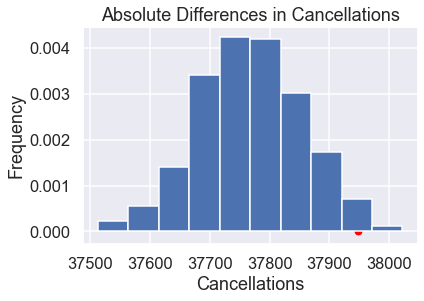

In [28]:
title = 'Absolute Differences in Cancellations'
pd.Series(differences).plot(kind='hist', density=True, title=title)
plt.xlabel('Cancellations')
plt.scatter(observed, 0, color='red', s=40);


In [29]:
#Pvalue
np.count_nonzero(differences >= observed) / n_repetitions

0.016

We now have evidence to show that the number of kids present in a reservation may not have much influence over whether or not it is canceled.

# Correlation, Pre-processing, and Model

In [30]:
import seaborn as sns
import warnings

warnings.simplefilter("ignore")
hotel_clean = hotel_clean.sample(frac = 0.2, replace = True, random_state = 1)
hotel_categorical = hotel_clean[['is_canceled','lead_time', 'adults', 'adr', 'children', 'babies']]
# hotel_categorical = hotel_categorical.sample(frac=0.2, replace=True, random_state=1)

## Correlation matrix of features 

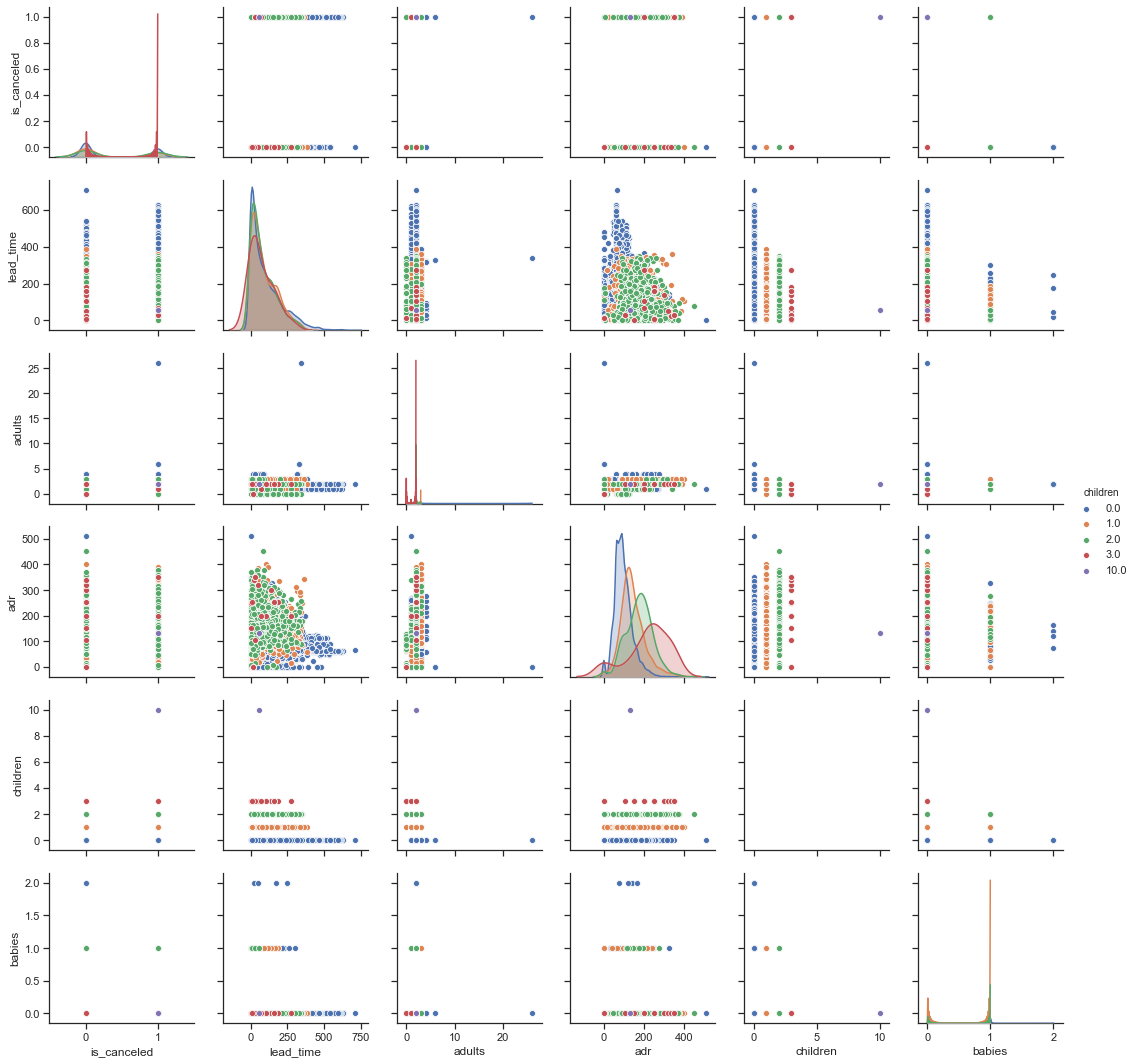

In [31]:
sns.set(style="ticks")
sns.pairplot(hotel_categorical, hue = 'children')

## Pearson Correlation Heatmap

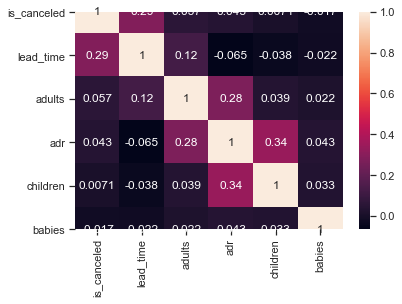

In [32]:
cor = hotel_categorical.corr()
sns.heatmap(cor, annot=True)

In [33]:
cor

,is_canceled,lead_time,adults,adr,children,babies
is_canceled,1.000000,0.288486,0.057406,0.042724,0.007126,-0.017170
lead_time,0.288486,1.000000,0.124706,-0.064843,-0.038275,-0.021998
adults,0.057406,0.124706,1.000000,0.276142,0.038526,0.022297
adr,0.042724,-0.064843,0.276142,1.000000,0.342121,0.043118
children,0.007126,-0.038275,0.038526,0.342121,1.000000,0.033273
babies,-0.017170,-0.021998,0.022297,0.043118,0.033273,1.000000


In [34]:
hotel_categorical.head()

,is_canceled,lead_time,adults,adr,children,babies
98634,0,256,2,95.40,0.0,0
77759,0,17,1,0.00,0.0,0
5198,0,206,2,52.98,0.0,0
98141,0,21,2,170.00,0.0,0
50082,1,40,3,135.76,0.0,0


In [35]:
total_cancelations = hotel_categorical["is_canceled"].sum()


In [36]:
cancel_corr = hotel_clean.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.288486
total_of_special_requests         0.232724
required_car_parking_spaces       0.198776
booking_changes                   0.136437
previous_cancellations            0.112911
company                           0.082657
is_repeated_guest                 0.081908
adults                            0.057406
previous_bookings_not_canceled    0.054054
days_in_waiting_list              0.053176
agent                             0.047131
adr                               0.042724
stays_in_week_nights              0.028127
babies                            0.017170
arrival_date_week_number          0.013753
stays_in_weekend_nights           0.009557
children                          0.007126
arrival_date_day_of_month         0.006672
arrival_date_year                 0.003491
has_kids                          0.001096
Name: is_canceled, dtype: float64

## Preprocessing. Separation of numerical and categorical columns.

In [37]:
# We preprocessed the columns after splitting the data into
# 1. Numerical and Categorical Data <br>
# 2. X,y splits for preprocessing the training and test data

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

categorical = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

features = numerical + categorical 
#test data and training data
X = hotel_clean.drop(["is_canceled"], axis=1)[features]
y = hotel_clean["is_canceled"]

numerical_transformer = SimpleImputer(strategy="constant")

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[("numerical", numerical_transformer, numerical),
                                               ("categorical", categorical_transformer, numerical)])

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LogisticRegression(n_jobs=-1)
pl = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])


pl.fit(X_train, y_train)
preds = pl.predict(X_test)
score = accuracy_score(y_test, preds)
print(score)

0.8114908785908995


# Ethics & Privacy

When thinking about the ethics and privacy involved with our research question we carefully examined the dataset we were using. The main concern would be ensuring the privacy of guests staying at hotels ensuring their identity and information were safe.  The data set we used was taken from Kaggle and created by Jesse Mostipak who created the data set for anyone looking to practice data analysis and create predictive models. In terms of privacy concerns the data set is focused primarily on booking information taken from hotels which doesn’t contain any personal information from any guests who stayed at these locations. While the data contains numbers related to how many adults, children, or babies the guests had when staying at the resort, it was stated that all personally identifying information had already been removed from the dataset. When examining the dataset for potential biases it was noted that the set took booking information between a city and resort hotel. This could explain certain trends seen within the data such as what time of year customers were most likely to spend at either one of these destinations. Perhaps the summer time brought in more customers for the resort hotel while the customer hotel had more guests during the fall due to conferences or events being held around that time. 

When working with this data set there are still some factors unknown about how exactly the data was collected. While we know the information came from a city or resort hotel the information about where exactly these hotels were located wasn’t known and could affect interpretations about the data. The limited data about the guests also makes it difficult to examine patterns about things such as which countries might travel more or highlight the different hotel marketing systems within different countries. Working with this data sample with limited information about things such as this makes it difficult to learn the specifics and draw more precise conclusions on the overall population of hotels.

After analyzing the data and looking for potential biases the number of children and babies could be factors to consider. However, these numbers were the lowest in the model which suggests that the bias may not be sigificant, but is still worth noting. 

# Conclusion & Discussion

We originally expected the number of children in a reservation to highly influence whether or not a reservation would be cancelled. By grouping the data and obtaining the relevant distributions, we saw that both cancelled and not cancelled reservations had nearly the same percentage of reservations with children. This was evidence of our hypothesis being incorrect. We performed a permutation test to ensure that was the case. Additionally, we created a classification model and obtained the coefficients for each feature. These all displayed results that show that we were wrong in our original hypothesis, and the number of children does not significantly impact whether or not a reservation would be canceled


After looking at different features of the data set and extracting information based on various EDA's we finally came to a point where we looked at the most important features based on the correlation matrix and pearson correlation heat maps to find which essential features should be considered in the model. For the choice of model for classification, we chose to stick with logistic regression, which is a vetted model to use for binary predictions (i.e canceled or not). Other models we could have used are Random Forest or SVM's although after doing some research across features and effectiveness across models with the addition of flexibility for hyper parameter tuning Logistic Regression made the most sense. To be able to do the regression we had to first preprocess the data which included the splitting of numerical and categorical data to then impute and encode the data for appropriate functioning of the pipeline and model. Pipelines - as we learnt about in class allow a bunch of preprocessing and modelling tools to be consolidated into one fit and transform sequence.

The limitations of our analysis is restricted to the dataset used. Building off the work done within this project some future steps to take would be to identify potential factors that could help in the overall analysis of a customer's cancellation. Within the dataset there was no room for free response or explanations as to why a customer cancelled their reservation. A simple survey asking why the customer cancelled their reservation with general options such as personal issues, costs, etc could help hotel’s understand what they can improve on. Other potential factors that could offer potential insight would be looking at the previous number of reservations a customer had with the same hotel and perhaps an in depth look at other hotels within the area, location, restaurants, and tourist attractions could help in providing hotel’s a comprehensive analysis as to what they could improve on.  



# Team Contributions

**Neel Shah**
 - Along with one of my teammates I worked on the initial part of the writeup - background research and dataset discoveries. Additionally, I worked on the preprocessing and model creation for the final list of features created after the EDA performed by my other teammates.

**Alex Pham**
- Handled the EDA in regards to the number of children. Created distributions and performed a permutation test to discover whether or not the number of children had an influence over whether or not a hotel reservation would be canceled.

**Pratyush Juneja**
 - Worked on initial EDA based on finding how many values were missing, how many of those value could be reused or saved if they had important information in the other columns and wrote a basic script to clean the data. Helped out in discussion and planning of the model afterwards.
 

**Ethan Khong**
 - Was responsible for compiling overall notebook with each member's work. Conducted background research on related projects as well as discussed ethics and privacy considerations with regards to data set and overall project. Examined some correlations amongst different factors relating to cancellations within hotel booking dataset. 